In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import os

In [5]:
# Load sentences and labels from text files

corpus_path = os.path.join('..', 'Dataset', 'corpus.txt')
with open(corpus_path, 'r', encoding='utf-8') as f:
    sentences = f.readlines()

labels_path = os.path.join('..', 'Dataset', 'labels.txt')
with open(labels_path, 'r', encoding='utf-8') as f:
    labels = f.readlines()

In [6]:
# Shuffle the dataset
seed = 42  # Set a seed for reproducibility
np.random.seed(seed)
indices = np.arange(len(sentences))
np.random.shuffle(indices)

sentences = np.array(sentences)[indices]
labels = np.array(labels)[indices]

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=seed)

In [8]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [9]:
svm_model = SVC()

# Grid Search to find the best parameters
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [10]:
# Use the best model for predictions
y_pred = best_model.predict(X_test_tfidf)

# Evaluate the accuracy of the best model
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy of the Best Model: {accuracy * 100:.2f}%")

# Validation Curve for C parameter
param_range = [0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
    SVC(kernel='linear', gamma='auto'), X_train_tfidf, y_train,
    param_name='C', param_range=param_range, cv=5, scoring='accuracy'
)

Accuracy of the Best Model: 75.42%


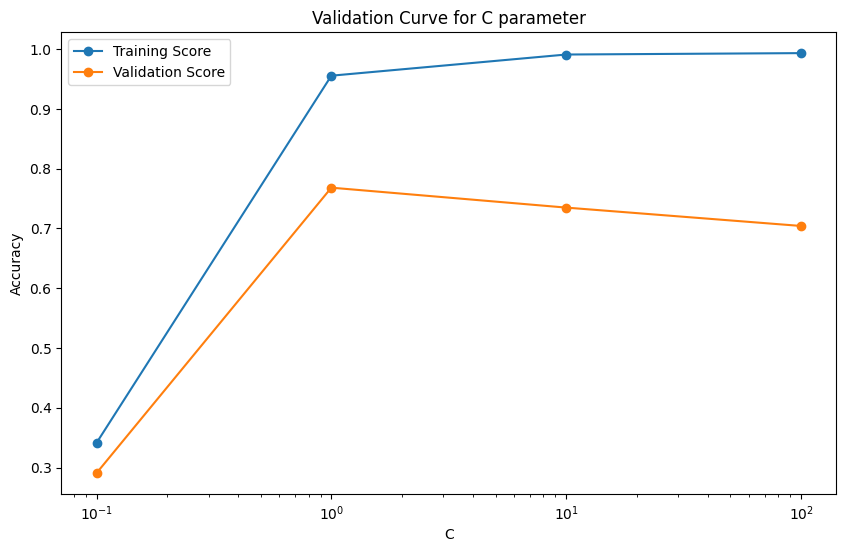

In [11]:
# Plot Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score', marker='o')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score', marker='o')
plt.xscale('log')
plt.title('Validation Curve for C parameter')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()